In [1]:
import cv2
import mediapipe as mp
import math

# mediapipe 중 pose 이용
  
장점은 상반신만 추적해서 빠르다는 것, 단점은 3d정보처리가 아니라는 점

In [2]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# 웹캠 초기화
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # BGR 이미지를 RGB 이미지로 변환
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Pose 모델을 사용하여 포즈 감지
    results = pose.process(rgb_frame)

    if results.pose_landmarks:
        # 감지된 포즈를 그림으로 표현
        mp_drawing = mp.solutions.drawing_utils
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    cv2.imshow('MediaPipe Pose Drawing', frame)

    if cv2.waitKey(1) & 0xFF == 27:  # 'ESC' 키를 누르면 종료
        break

# 종료 시 정리
cap.release()
cv2.destroyAllWindows()

### 포즈에서 중요하다고 생각하는 점들 위치 추출하기

https://github.com/google/mediapipe/blob/master/docs/solutions/pose.md  
https://developers.google.com/mediapipe/solutions/vision/pose_landmarker/  
참고하기

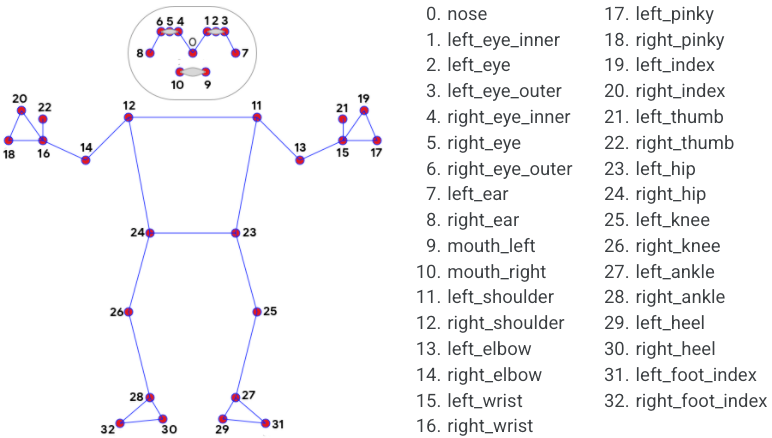

In [3]:
# MediaPipe 초기화
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# 웹캠 초기화
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # BGR 이미지를 RGB 이미지로 변환
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Pose 모델을 사용하여 양 어깨 위치 감지
    results = pose.process(rgb_frame)

    if results.pose_landmarks:
        left_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER]
        right_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER]

        if left_shoulder and right_shoulder:
            # 양 어깨의 2D 좌표 추출
            left_shoulder_x, left_shoulder_y = int(left_shoulder.x * frame.shape[1]), int(left_shoulder.y * frame.shape[0])
            right_shoulder_x, right_shoulder_y = int(right_shoulder.x * frame.shape[1]), int(right_shoulder.y * frame.shape[0])

            # 어깨 거리 계산 (픽셀 단위)
            shoulder_distance = math.sqrt((right_shoulder_x - left_shoulder_x) ** 2 + (right_shoulder_y - left_shoulder_y) ** 2)

            # 화면에 어깨 거리 표시
            cv2.line(frame, (left_shoulder_x, left_shoulder_y), (right_shoulder_x, right_shoulder_y), (0, 255, 0), 2)
            cv2.putText(frame, f'Shoulder Distance: {shoulder_distance:.2f} pixels', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow('Shoulder Distance Measurement', frame)

    if cv2.waitKey(1) & 0xFF == 27:  # 'ESC' 키를 누르면 종료
        break

# 종료 시 정리
cap.release()
cv2.destroyAllWindows()

양쪽 어꺠거리가 사람마다 일정하니까 그걸 토대로 거리를 측정하는 방법은 어떨까?  
이러면 문제가 생기는 점이 사람마다 어깨넓이가 다르다는 건데 보편적으로 일정한 길이를 보정할 방법이 없을까?  

# mediapipe중에서 holostic 이용하기

In [22]:
# MediaPipe 초기화
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic()

# 웹캠 초기화
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # BGR 이미지를 RGB 이미지로 변환
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Holistic 모델을 사용하여 전신 자세 인식
    results = holistic.process(rgb_frame)

    if results.pose_landmarks:
        # 감지된 자세를 그림으로 표현
        mp_drawing = mp.solutions.drawing_utils
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

    cv2.imshow('MediaPipe Holistic Pose Detection', frame)

    if cv2.waitKey(1) & 0xFF == 27:  # 'ESC' 키를 누르면 종료
        break

# 종료 시 정리
cap.release()
cv2.destroyAllWindows()


### Holostic을 이용한 어꺠 측정

In [23]:
# MediaPipe 초기화
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic()

# 웹캠 초기화
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # BGR 이미지를 RGB 이미지로 변환
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Holistic 모델을 사용하여 전신 자세 인식
    results = holistic.process(rgb_frame)

    if results.pose_landmarks:
        # 양 어깨의 2D 좌표 추출
        left_shoulder = results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_SHOULDER]
        right_shoulder = results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_SHOULDER]

        if left_shoulder and right_shoulder:
            left_shoulder_x, left_shoulder_y = int(left_shoulder.x * frame.shape[1]), int(left_shoulder.y * frame.shape[0])
            right_shoulder_x, right_shoulder_y = int(right_shoulder.x * frame.shape[1]), int(right_shoulder.y * frame.shape[0])

            # 어깨 사이의 거리 계산 (픽셀 단위)
            shoulder_distance = math.sqrt((right_shoulder_x - left_shoulder_x) ** 2 + (right_shoulder_y - left_shoulder_y) ** 2)

            # 화면에 어깨 사이 거리 표시
            cv2.line(frame, (left_shoulder_x, left_shoulder_y), (right_shoulder_x, right_shoulder_y), (0, 255, 0), 2)
            cv2.putText(frame, f'Shoulder Distance: {shoulder_distance:.2f} pixels', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # 어깨 위치 반환 (x, y 좌표)
            shoulder_positions = {'left_shoulder': (left_shoulder_x, left_shoulder_y), 'right_shoulder': (right_shoulder_x, right_shoulder_y)}
            print(shoulder_positions)

    cv2.imshow('Shoulder Distance Measurement', frame)

    if cv2.waitKey(1) & 0xFF == 27:  # 'ESC' 키를 누르면 종료
        break

# 종료 시 정리
cap.release()
cv2.destroyAllWindows()

{'left_shoulder': (1288, 1079), 'right_shoulder': (696, 1040)}
{'left_shoulder': (1299, 1078), 'right_shoulder': (695, 1040)}
{'left_shoulder': (1320, 1064), 'right_shoulder': (685, 1037)}
{'left_shoulder': (1328, 1052), 'right_shoulder': (679, 1028)}
{'left_shoulder': (1335, 1047), 'right_shoulder': (678, 1020)}
{'left_shoulder': (1340, 1041), 'right_shoulder': (675, 1012)}
{'left_shoulder': (1342, 1038), 'right_shoulder': (672, 1005)}
{'left_shoulder': (1341, 1026), 'right_shoulder': (671, 992)}
{'left_shoulder': (1342, 1022), 'right_shoulder': (662, 990)}
{'left_shoulder': (1341, 1013), 'right_shoulder': (659, 977)}
{'left_shoulder': (1344, 1007), 'right_shoulder': (658, 962)}
{'left_shoulder': (1348, 1002), 'right_shoulder': (653, 959)}
{'left_shoulder': (1348, 996), 'right_shoulder': (648, 948)}
{'left_shoulder': (1348, 994), 'right_shoulder': (643, 951)}
{'left_shoulder': (1348, 993), 'right_shoulder': (642, 953)}
{'left_shoulder': (1348, 990), 'right_shoulder': (640, 954)}
{'lef

아래 코드는 머리 각도를 측정하는 코드인데 뭔가 오류가 생긴다.  
아마도 0으로 나눠지는 부분이 존재하는거 같은데 어디서 그런지 모르겠다

In [2]:
# MediaPipe 초기화
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic()

# 웹캠 초기화
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # BGR 이미지를 RGB 이미지로 변환
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Holistic 모델을 사용하여 전신 자세 인식
    results = holistic.process(rgb_frame)

    if results.pose_landmarks:
        # 어깨 위치 추출
        left_shoulder = results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_SHOULDER]
        right_shoulder = results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_SHOULDER]

        # 머리 위치 추출
        head = results.face_landmarks.landmark[0]

        if left_shoulder and right_shoulder and head:
            # 어깨의 중심 위치 계산
            shoulder_center_x = (left_shoulder.x + right_shoulder.x) / 2
            shoulder_center_y = (left_shoulder.y + right_shoulder.y) / 2

            # 어깨 중심에서 머리까지의 거리 계산 (픽셀 단위)
            distance_to_head = math.sqrt((head.x - shoulder_center_x) ** 2 + (head.y - shoulder_center_y) ** 2)

            # 고개의 숙임 각도 계산 (라디안)
            angle_radians = math.atan2(distance_to_head, abs(right_shoulder.x - left_shoulder.x))

            # 고개의 숙임 각도를 도(degrees)로 변환
            angle_degrees = math.degrees(angle_radians)

            # 화면에 숙임 각도 표시
            cv2.putText(frame, f'Head Tilt Angle: {angle_degrees:.2f} degrees', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow('Head Tilt Measurement', frame)

    if cv2.waitKey(1) & 0xFF == 27:  # 'ESC' 키를 누르면 종료
        break

# 종료 시 정리
cap.release()
cv2.destroyAllWindows()

: 